In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('sample_data/case1.csv', sep=";")

In [4]:
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Usunięcie niepotrzebnej kolumny oraz usunięcie wierszy z 'None'

In [5]:
#Usunięcie niepotrzebnej kolumny
df.drop('Index', axis=1, inplace=True)
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
#Usunięcię nullów
df.dropna(inplace=True)
#df = df[~df['Address'].astype(str).str.replace('.','',1).str.isnumeric()]
df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,9832,0xfea28ca175a80f5a348016583961f63be8605f80,1,0.00,0.00,0.00,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,Blockwell say NOTSAFU
9836,9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com


In [6]:
columns_to_check = ["ERC20 avg time between sent tnx", "ERC20 avg time between rec tnx", "ERC20 avg time between rec 2 tnx", "ERC20 avg time between contract tnx", "ERC20 min val sent contract", "ERC20 avg val sent contract", "ERC20 max val sent contract"]
for x in columns_to_check:

    class_counts = df[x].value_counts()

    num_unique_values = df[x].nunique()

    print("Number of unique values in the column:", num_unique_values)

Number of unique values in the column: 1
Number of unique values in the column: 1
Number of unique values in the column: 1
Number of unique values in the column: 1
Number of unique values in the column: 1
Number of unique values in the column: 1
Number of unique values in the column: 1


Usunięcie kolumn, które mają te same wartości we wszystkich wierszach

In [7]:
df.drop(columns=columns_to_check, inplace=True)
df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,None,XENON
3,3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,9832,0xfea28ca175a80f5a348016583961f63be8605f80,1,0.00,0.00,0.00,0,0,0,0,...,0.00,1.337000e+01,6.685000,0.000000,0.000000e+00,0.000000,0.0,2.0,,Blockwell say NOTSAFU
9836,9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,...,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,...,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,...,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com


In [8]:
class_counts = df['FLAG'].value_counts()

print(class_counts)

num_unique_values = df['FLAG'].nunique()

#print("Number of 0 and 1:", num_unique_values)

0    7631
1    1350
Name: FLAG, dtype: int64


Standaryzacja

In [9]:
from sklearn.preprocessing import StandardScaler
#Standaryzacja
num_cols = ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'min value received', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,-0.205022,-0.306156,1.422068,0.778117,-0.087060,0,40,...,-0.028814,-0.010470,-0.018982,-0.011164,0.003173,-0.010243,39.0,57.0,Cofoundit,Numeraire
1,1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,0.330689,-0.226517,2.973882,-0.036861,-0.171361,0,5,...,-0.028814,-0.011891,-0.020220,-0.011162,-0.011068,-0.010701,1.0,7.0,Livepeer Token,Livepeer Token
2,2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,10.872850,-0.248914,0.853680,-0.156444,-0.169279,0,10,...,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,8.0,None,XENON
3,3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,0.218286,0.321285,0.493485,-0.126548,-0.170320,0,7,...,-0.028814,-0.011890,-0.020213,-0.011069,-0.011060,-0.010695,1.0,11.0,Raiden,XENON
4,4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,-0.241488,0.104442,0.447896,5.817468,-0.158872,1,7,...,-0.028814,-0.011883,-0.020197,-0.011164,-0.011030,-0.010678,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,9832,0xfea28ca175a80f5a348016583961f63be8605f80,1,-0.243141,-0.352867,-0.708103,-0.159043,-0.179687,0,0,...,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,2.0,,Blockwell say NOTSAFU
9836,9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,0.327349,-0.325901,-0.530539,-0.153844,-0.166157,0,11,...,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,2.0,,GSENetwork
9837,9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,-0.243141,-0.352867,-0.708103,-0.159043,-0.179687,0,0,...,-0.028024,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,-0.130289,-0.259366,0.082573,-0.071956,-0.134934,0,31,...,-0.028814,-0.011891,-0.020219,-0.011164,-0.011068,-0.010701,0.0,5.0,,Free BOB Tokens - BobsRepair.com


Encoding kolumn/zmiennych kategorycznych

In [10]:
from sklearn.preprocessing import LabelEncoder

#Dekodowanie
label_encoder = LabelEncoder()
df['Address'] = label_encoder.fit_transform(df['Address'])

label_encoder = LabelEncoder()
df['ERC20 most sent token type'] = label_encoder.fit_transform(df['ERC20 most sent token type'])

label_encoder = LabelEncoder()
df['ERC20_most_rec_token_type'] = label_encoder.fit_transform(df['ERC20_most_rec_token_type'])

df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0,0,-0.205022,-0.306156,1.422068,0.778117,-0.087060,0,40,...,-0.028814,-0.010470,-0.018982,-0.011164,0.003173,-0.010243,39.0,57.0,63,300
1,1,1,0,0.330689,-0.226517,2.973882,-0.036861,-0.171361,0,5,...,-0.028814,-0.011891,-0.020220,-0.011162,-0.011068,-0.010701,1.0,7.0,154,257
2,2,2,0,10.872850,-0.248914,0.853680,-0.156444,-0.169279,0,10,...,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,8.0,185,436
3,3,3,0,0.218286,0.321285,0.493485,-0.126548,-0.170320,0,7,...,-0.028814,-0.011890,-0.020213,-0.011069,-0.011060,-0.010695,1.0,11.0,217,436
4,4,4,0,-0.241488,0.104442,0.447896,5.817468,-0.158872,1,7,...,-0.028814,-0.011883,-0.020197,-0.011164,-0.011030,-0.010678,6.0,27.0,238,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,9832,8948,1,-0.243141,-0.352867,-0.708103,-0.159043,-0.179687,0,0,...,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,2.0,1,74
9836,9836,8949,1,0.327349,-0.325901,-0.530539,-0.153844,-0.166157,0,11,...,-0.028814,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,2.0,1,194
9837,9837,8950,1,-0.243141,-0.352867,-0.708103,-0.159043,-0.179687,0,0,...,-0.028024,-0.011891,-0.020220,-0.011164,-0.011068,-0.010701,0.0,1.0,1,74
9838,9838,8951,1,-0.130289,-0.259366,0.082573,-0.071956,-0.134934,0,31,...,-0.028814,-0.011891,-0.020219,-0.011164,-0.011068,-0.010701,0.0,5.0,1,185


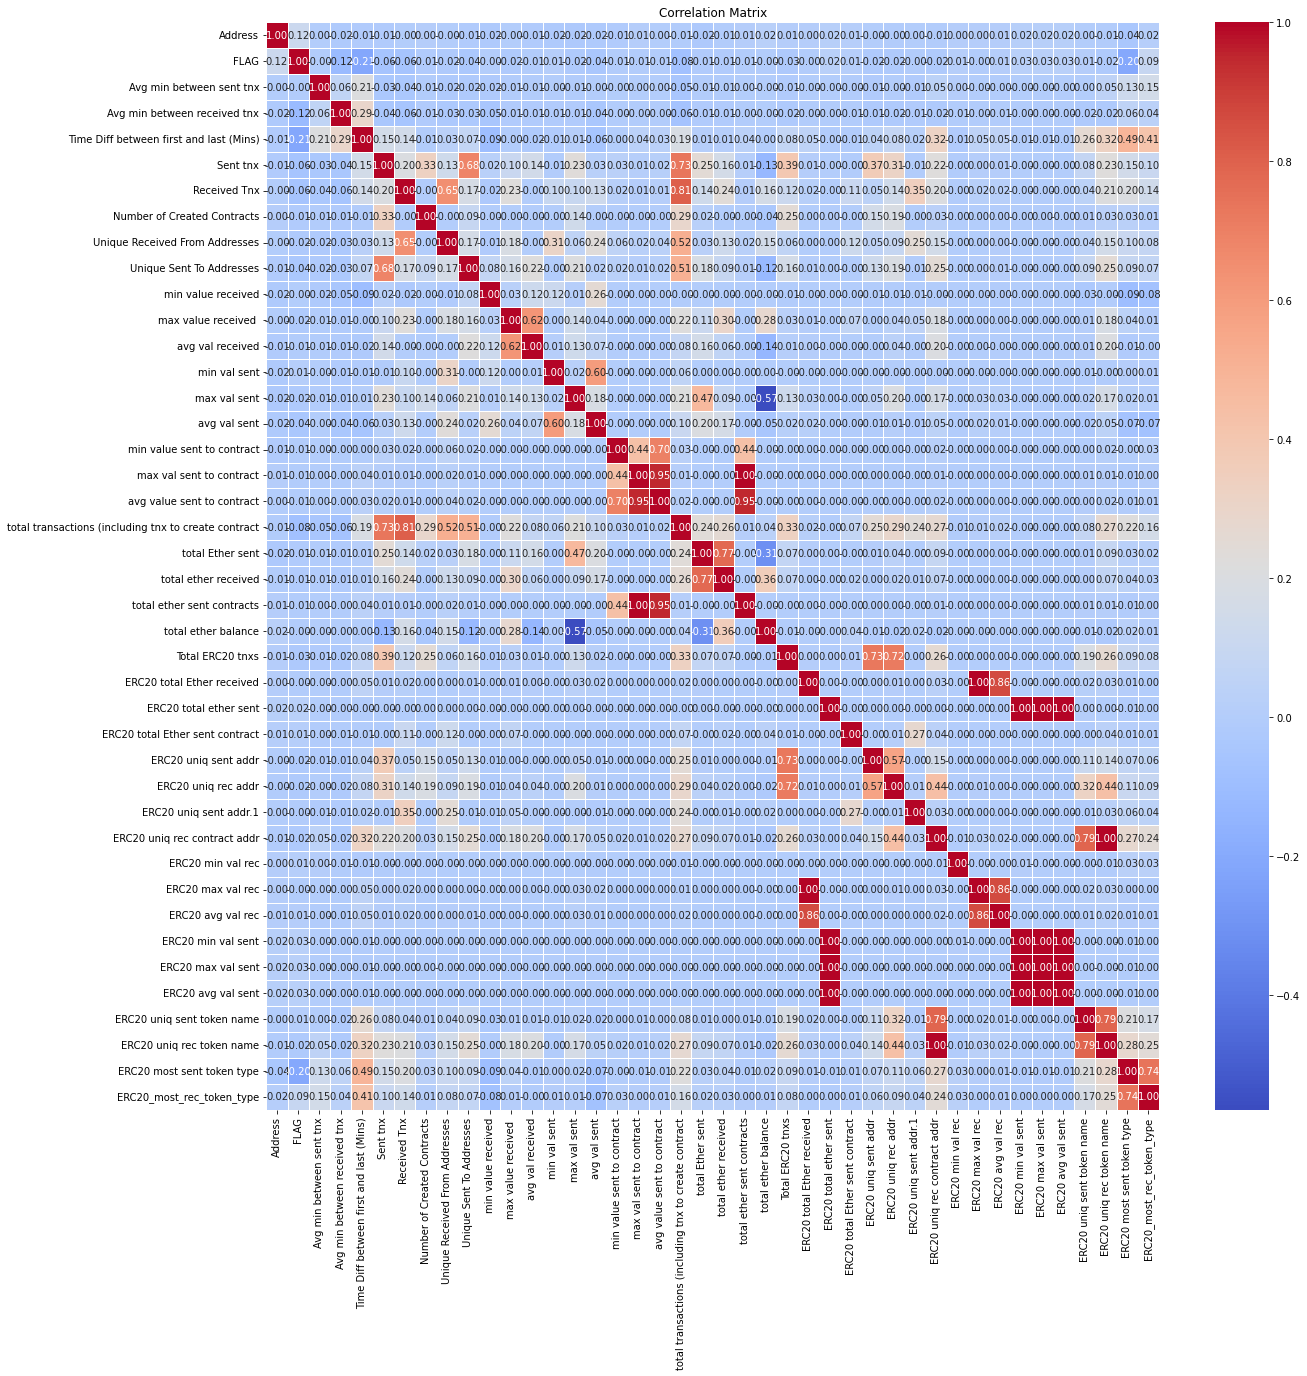

In [11]:
# Zdecydowałem się usunąć zmienne o korelacji większej niż |0.90|
df_filtered = df.drop(columns=['Index'])
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Usunięcie zmiennych o korelacji większej niż |0.90|

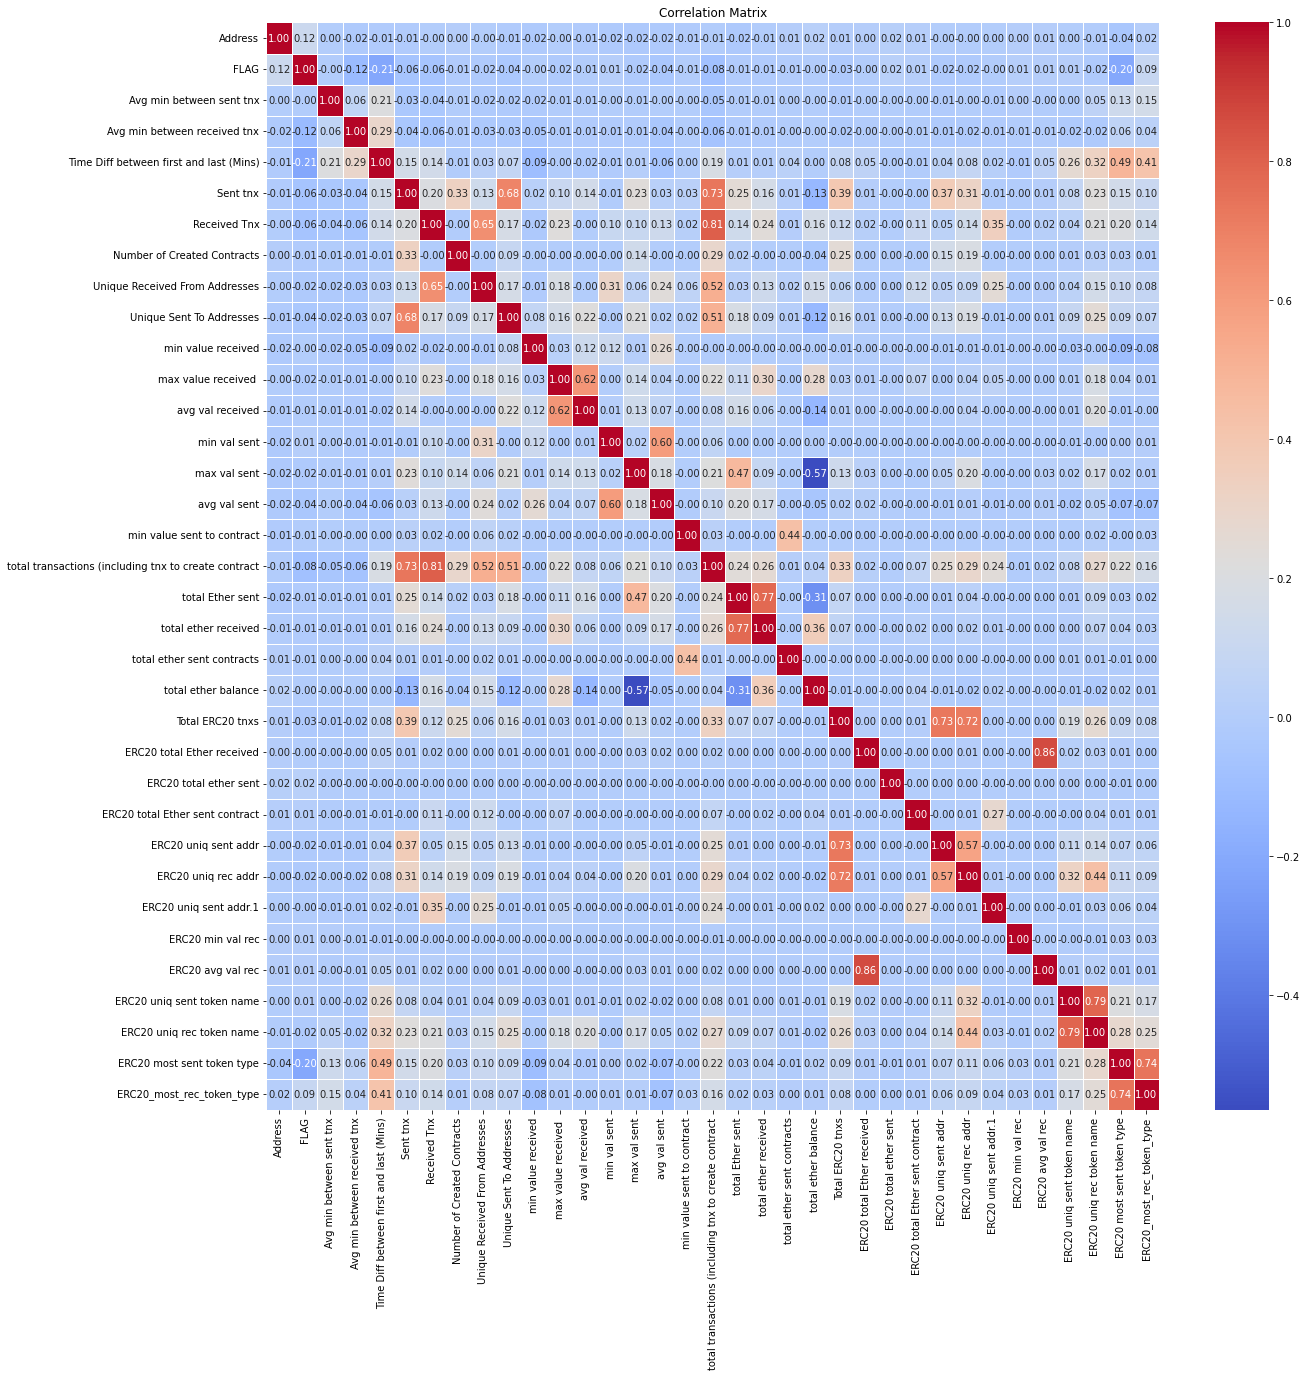

In [12]:
df = df.drop(columns=['ERC20 max val sent', 'ERC20 min val sent','ERC20 max val rec', 'max val sent to contract', 'ERC20 avg val sent', 'ERC20 uniq rec contract addr', 'avg value sent to contract'])
df_filtered = df.drop(columns=['Index'])
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
X = df.drop(columns=['FLAG', 'Index'])
y = df['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Test 5 modeli: kNN, Dzewo decyzyjne, Las losowy, SVM, Regresja logistyczna

Wybrano najbardziej optymalne parametry (GridSearch)

In [24]:
param_grids = {
    'kNN': {'n_neighbors': [3, 5, 9, 11], 'metric': ['euclidean', 'manhattan'],'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [3, 7, 9, 11, None]},
    'Random Forest': {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 7, 9, 11, None]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001, 'scale']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['lbfgs'], 'max_iter': [10000]}
}

classifiers = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}


for classifier_name, classifier in classifiers.items():
    print(f"Testing {classifier_name}...")

    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5)
    grid_search.fit(X_train, y_train)
  
    print(f"Najlepsze parametry dla {classifier_name}: {grid_search.best_params_}")
   
    best_model = grid_search.best_estimator_
 
    y_pred = best_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    print(f"Najlepszy {classifier_name}:")
    print()
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print()
    print("Confusion matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print()
  
    print(classification_report(y_test, y_pred))
    print()

Testing kNN...
Najlepsze parametry dla kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Najlepszy kNN:

Accuracy: 0.9736842105263158
Recall: 0.8805309734513275
Precision: 0.943127962085308

Confusion matrix:
[[2488   24]
 [  54  398]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2512
           1       0.94      0.88      0.91       452

    accuracy                           0.97      2964
   macro avg       0.96      0.94      0.95      2964
weighted avg       0.97      0.97      0.97      2964


Testing Decision Tree...
Najlepsze parametry dla Decision Tree: {'max_depth': 7}
Najlepszy Decision Tree:

Accuracy: 0.9868421052631579
Recall: 0.9424778761061947
Precision: 0.9703872437357631

Confusion matrix:
[[2499   13]
 [  26  426]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2512
           1       0.97      0.94      0.96       452

    accurac

Undersampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler #import the required library
rus=RandomUnderSampler() #RandomUnderSampler object
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)#apply to
RandomUnderSampler
y_train_rus.value_counts()

0    898
1    898
Name: FLAG, dtype: int64

In [26]:
for classifier_name, classifier in classifiers.items():
    print(f"Testing {classifier_name}...")

    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5)
    grid_search.fit(X_train_rus, y_train_rus)
  
    print(f"Najlepsze parametry dla {classifier_name}: {grid_search.best_params_}")
   
    best_model = grid_search.best_estimator_
 
    y_pred = best_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    print(f"Najlepszy {classifier_name}:")
    print()
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print()
    print("Confusion matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print()
  
    print(classification_report(y_test, y_pred))
    print()

Testing kNN...
Najlepsze parametry dla kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Najlepszy kNN:

Accuracy: 0.9294871794871795
Recall: 0.9070796460176991
Precision: 0.7105719237435009

Confusion matrix:
[[2345  167]
 [  42  410]]

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2512
           1       0.71      0.91      0.80       452

    accuracy                           0.93      2964
   macro avg       0.85      0.92      0.88      2964
weighted avg       0.94      0.93      0.93      2964


Testing Decision Tree...
Najlepsze parametry dla Decision Tree: {'max_depth': None}
Najlepszy Decision Tree:

Accuracy: 0.9618758434547908
Recall: 0.9800884955752213
Precision: 0.8098720292504571

Confusion matrix:
[[2408  104]
 [   9  443]]

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2512
           1       0.81      0.98      0.89       452

    acc

Oversampling

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
counter = Counter(y)

In [28]:
for classifier_name, classifier in classifiers.items():
    print(f"Testing {classifier_name}...")

    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=5)
    grid_search.fit(X_train_os, y_train_os)
  
    print(f"Najlepsze parametry dla {classifier_name}: {grid_search.best_params_}")
   
    best_model = grid_search.best_estimator_
 
    y_pred = best_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    print(f"Best {classifier_name}:")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print()
    print("Confusion matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print()
  
    print(classification_report(y_test, y_pred))
    print()

Testing kNN...


Najlepsze parametry dla kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best kNN:
Accuracy: 0.9568151147098516
Recall: 0.9092920353982301
Precision: 0.8253012048192772

Confusion matrix:
[[2425   87]
 [  41  411]]

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2512
           1       0.83      0.91      0.87       452

    accuracy                           0.96      2964
   macro avg       0.90      0.94      0.92      2964
weighted avg       0.96      0.96      0.96      2964


Testing Decision Tree...
Najlepsze parametry dla Decision Tree: {'max_depth': None}
Best Decision Tree:
Accuracy: 0.988191632928475
Recall: 0.9778761061946902
Precision: 0.9464668094218416

Confusion matrix:
[[2487   25]
 [  10  442]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2512
           1       0.95      0.98      0.96       452

    accuracy                       

Wybieram model: Las decyzyjny z parametrami {'max_depth': 11, 'n_estimators': 150}

Dla zoversamplingowanej próbki (SMOTE) uzyskał on wyniki:

Accuracy = 0.9939271255060729

Recall = 0.9756637168141593

Precision = 0.984375

W danym zadaniu najbardziej zależy nam na właściwym sklasyfikowani klasy '1' (oszustwo), a najbardziej na recall (pełności) klasy '1'. Najlepszy recall klasy '1' uzyskał model drzewa decyzyjnego (0.97787610619). Jest on jednak jedynie minimalnie lepszy od recall klasy '1' uzyskanego przez las losowy:

Recall_1 = 0.97571743929

Precision_1 = 0.98440979955